In [1]:
import optuna
import Optimization as OP
import FrameworkLib as FL
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx   
import pickle

N_agents = 6
max_dist = 5
threshold = 1e-2
cov_threshold = 0
box_margin = 10
search_margin = 0.5
Niter = 5000

conn = False
while conn==False:
    pos = {i: (random.uniform(search_margin, box_margin-search_margin), random.uniform(search_margin, box_margin-search_margin)) for i in range(N_agents)}        
    pos = np.array(list(pos.values()))
    pos.reshape(N_agents, 2)        
    G = FL.generate_graph(pos,max_dist)
    cov = FL.get_coverage(G)
    
    if nx.is_connected(G) and cov> cov_threshold:
        conn = True
        pos_fix = pos[:N_agents-1,:]
        pos_fix = pos_fix.flatten()
        pos_mov = pos[N_agents-1,:]
        pos_mov = pos_mov.flatten()
        box_margin_mov = np.array([pos_mov[0]-search_margin,pos_mov[0]+search_margin,pos_mov[1]-search_margin,pos_mov[1]+search_margin])
        

In [2]:
alpha = 0 
op = OP.Objective(N_agents,max_dist,threshold,box_margin_mov,alpha)
op.pos_fix = pos_fix

sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
study = optuna.create_study(
    directions=["maximize"],
    sampler=sampler,
    study_name="subset_agents",
    storage=None,
    load_if_exists=True,
)
study.optimize(op.objective_function, n_trials=Niter, n_jobs=8, timeout=600)

best_trials = study.best_trials
trials = study.trials
params_array_01 = []
for trial in best_trials:    
    params_array_01.append(np.array([list(trial.params.values())]))    
params_array_mass_01 = []
for trial in trials:    
    if trial.user_attrs['constraint'][0] < 0.0:
        params_array_mass_01.append(np.array([list(trial.params.values())]))
        
print("Dimensions of params_array:", np.array(params_array_01).shape)
print("Dimensions of params_array_mass:", np.array(params_array_mass_01).shape)

[I 2025-03-05 14:32:48,135] A new study created in memory with name: subset_agents
[I 2025-03-05 14:32:48,151] Trial 1 finished with value: 18.756546555777476 and parameters: {'pos0': 9.681911293648993, 'pos1': 6.63992199848357}.
[I 2025-03-05 14:32:48,158] Trial 2 finished with value: 18.756546555777476 and parameters: {'pos0': 9.743129063286231, 'pos1': 5.748720844160931}.
[I 2025-03-05 14:32:48,163] Trial 0 finished with value: 18.756546555777476 and parameters: {'pos0': 9.583825022780907, 'pos1': 6.631763368662972}.
[I 2025-03-05 14:32:48,171] Trial 3 finished with value: 18.756546555777476 and parameters: {'pos0': 9.150065272061324, 'pos1': 6.344797862609862}.
[I 2025-03-05 14:32:48,181] Trial 5 finished with value: 18.756546555777476 and parameters: {'pos0': 9.626338000740184, 'pos1': 6.63671608728189}.
[I 2025-03-05 14:32:48,181] Trial 4 finished with value: 18.756546555777476 and parameters: {'pos0': 9.64339076424732, 'pos1': 6.657856906717323}.
[I 2025-03-05 14:32:48,184] Tria

Dimensions of params_array: (0,)
Dimensions of params_array_mass: (0,)


In [3]:
alpha = 1
op = OP.Objective(N_agents,max_dist,threshold,box_margin_mov,alpha)
op.pos_fix = pos_fix

sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
study = optuna.create_study(
    directions=["maximize"],
    sampler=sampler,
    study_name="subset_agents",
    storage=None,
    load_if_exists=True,
)
study.optimize(op.objective_function, n_trials=Niter, n_jobs=4, timeout=600)

best_trials = study.best_trials
trials = study.trials
params_array_02 = []
for trial in best_trials:    
    params_array_02.append(np.array([list(trial.params.values())]))    
params_array_mass_02 = []
for trial in trials:    
    if trial.user_attrs['constraint'][0] < 0.0:
        params_array_mass_02.append(np.array([list(trial.params.values())]))
        
print("Dimensions of params_array:", np.array(params_array_02).shape)
print("Dimensions of params_array_mass:", np.array(params_array_mass_02).shape)

[I 2025-03-05 14:33:45,643] A new study created in memory with name: subset_agents
[I 2025-03-05 14:33:45,657] Trial 0 finished with value: 0.2679491924311226 and parameters: {'pos0': 9.489139456229418, 'pos1': 5.8013136254862125}.
[I 2025-03-05 14:33:45,662] Trial 1 finished with value: 0.2679491924311226 and parameters: {'pos0': 9.517085591281473, 'pos1': 5.950996624510064}.
[I 2025-03-05 14:33:45,663] Trial 3 finished with value: 0.2679491924311226 and parameters: {'pos0': 8.984634931424097, 'pos1': 6.521578682745244}.
[I 2025-03-05 14:33:45,664] Trial 2 finished with value: 0.2679491924311226 and parameters: {'pos0': 9.187180277115253, 'pos1': 6.530914005647278}.
[I 2025-03-05 14:33:45,669] Trial 4 finished with value: 0.2679491924311226 and parameters: {'pos0': 8.930022259889778, 'pos1': 6.650114340415299}.
[I 2025-03-05 14:33:45,672] Trial 5 finished with value: 0.2679491924311226 and parameters: {'pos0': 8.966551821624776, 'pos1': 6.559622817452542}.
[I 2025-03-05 14:33:45,677] 

Dimensions of params_array: (0,)
Dimensions of params_array_mass: (0,)


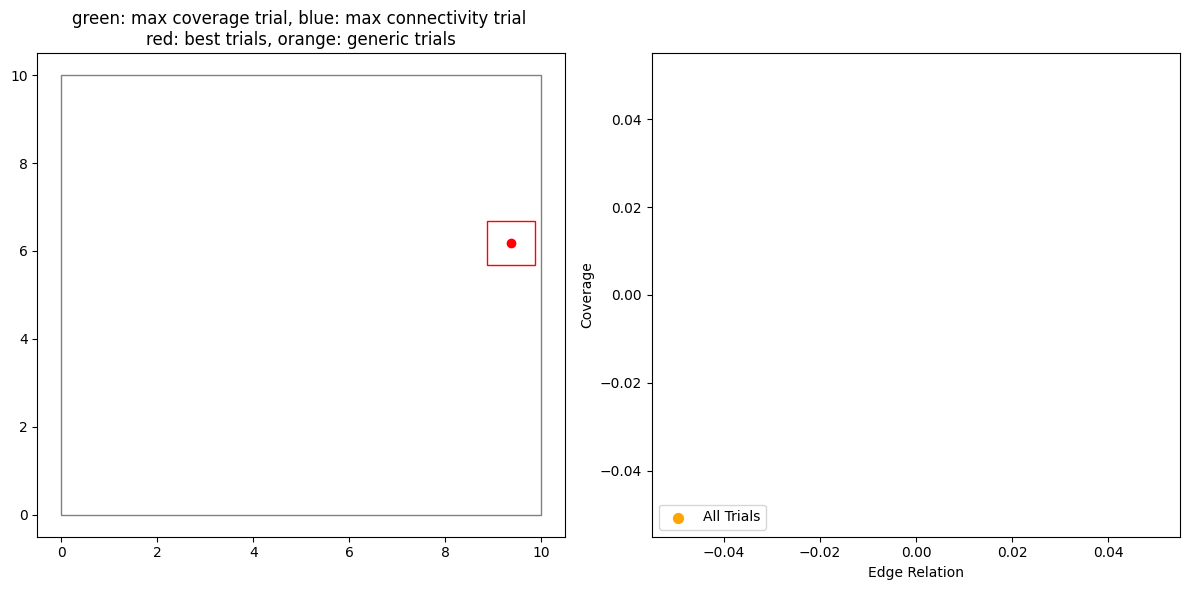

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax2.set_xlabel('Edge Relation')
ax2.set_ylabel('Coverage')
trans = 0.2

# Draw the box_margin box in the first subplot
box = plt.Rectangle((0, 0), box_margin, box_margin, fill=True, edgecolor='gray', linestyle='-', facecolor='white')
box_mov = plt.Rectangle((box_margin_mov[0], box_margin_mov[2]), box_margin_mov[1] - box_margin_mov[0], box_margin_mov[3] - box_margin_mov[2], \
                         fill=True, edgecolor='red', linestyle='-', facecolor='none')
ax1.add_patch(box)
ax1.add_patch(box_mov)
# Add the center of the second box as a marker
center_x = (box_margin_mov[0] + box_margin_mov[1]) / 2
center_y = (box_margin_mov[2] + box_margin_mov[3]) / 2
ax1.plot(center_x, center_y, marker='o', color='red')
ax1.title.set_text('green: max coverage trial, blue: max connectivity trial \nred: best trials, orange: generic trials')

i = 0
for pos in params_array_mass_01 + params_array_mass_02:  
    i = i + 1
    pos = np.asarray(pos[0])
    pos = np.hstack((op.pos_fix, pos)) 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist)         
    ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='orange', s=50)      
ax2.scatter([], [], color='orange', label='All Trials', s=50)

max_connectivity = float('-inf')
max_connectivity_graph = None
max_connectivity_pos = None

i = 0
for pos in params_array_01 + params_array_02:
    i += 1
    pos = np.asarray(pos[0])
    pos = np.hstack((op.pos_fix, pos)) 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos, max_dist)
    connectivity = FL.get_edge_relation(G)
    if connectivity > max_connectivity:
        max_connectivity = connectivity
        max_connectivity_graph = G
        max_connectivity_pos = pos
        max_connectivity_i = i
        
max_coverage = float('-inf')
max_coverage_graph = None
max_coverage_pos = None

i = 0
for pos in params_array_01 + params_array_02:
    i += 1
    pos = np.asarray(pos[0])
    pos = np.hstack((op.pos_fix, pos)) 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos, max_dist)
    coverage = FL.get_coverage(G)
    if coverage > max_coverage:
        max_coverage = coverage
        max_coverage_graph = G
        max_coverage_pos = pos  
        max_coverage_i = i    

i = 0
for pos in params_array_01 + params_array_02:   
    i = i + 1
    pos = np.asarray(pos[0])
    pos = np.hstack((op.pos_fix, pos)) 
    pos = pos.reshape((N_agents,2))
    G = FL.generate_graph(pos,max_dist)             
    ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='red', s=50, edgecolors='none', alpha=trans)
    if i == max_connectivity_i:
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='skyblue', s=400, edgecolors='black', label='Best Connectivity', alpha=trans)
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=False, node_color=['black'] * (N_agents - 1) + ['skyblue'], edge_color='blue', ax=ax1)    
    elif i == max_coverage_i:
        ax2.scatter(FL.get_edge_relation(G), FL.get_coverage(G), color='lightgreen', s=300, edgecolors='black', label='Best Coverage', alpha=trans)
        nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=False, node_color=['none'] * (N_agents - 1) + ['lightgreen'], edge_color='green', ax=ax1)    
        
ax2.legend(loc='lower left')
plt.tight_layout()
plt.show()